# Kaggle begining : Titanic competition

This notebook's goal is to analyse Titanics's data and predict who will surive in the Kaggle test set.

Competion website [here](https://www.kaggle.com/competitions/titanic)

## General part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row', 891)
pd.set_option('display.max_column', 12)

In [3]:
data =  pd.read_csv('data/train.csv') 
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


## Exploratory Data Analysis 

**Goal :** Understand data
EDA can be begin on the Kaggle website in the *Data* tab.

**Form :**
- **Target variable :** *Survived* wich show if passenger survived (=1) or not (=0)
- **Lines and columns :** 891 rows × 12 columns
- **Variables' type :** 7 numericals & 2 text. 
- **Missings data :**
  - *cabin* has particulary import missing ratio (> 77%)
  - *age* has some missings values (19.8%) -> drop NaN ? fill with median ?
  - No particular pattern in missings values.


**Content :**
- **Target visualisation :** 38% of passengers survived, 62% died.
- **Variables signification :**
  - *PassengerId* : **droped**
  - *Pclass* : qualitative -> 1 to 3 : passenger class, with half in 3thr and 25% for each else
  - *Name* : **droped**
  - *Sex* : qualitative -> 35% men
  - *Age* : quantitative -> median ~ 25 yo
  - *Sibsp* : quantitative -> siblings or spouse
  - *Parch* : quantitative -> parents or childs
  
  NB : 60% passengers was alone
  - *Ticket* : qualitative -> some passengers seems to have the same ticket
  - *Fare* : quantitative -> some outliers > 200
  - *Cabin* : cabin id
  - *Embarked* : qualitative -> port of embarkation : C = Cherbourg, Q = Queenstown, S = Southampton (majority)
- **Variables/Target relations :**
  - Pclass: 1st class seems to has more chance to survive and 3rd many more to die
  - Sex : woomen seems to has more chance to survive
  - Age : nothing noticeable for age even for 0-5 yo who seems to has more chance to survive
  - Sibsp & Parch : passenger who has 1 or 2 sibsp seems to has more chance to survive ; for parch : 1,2,3 => passenger with [1,3] family members seems to had more chance to survive
  - Fare : passenger who has buy ticket at low cost (3thr class ?) seems to have less chance to survive
  - Ticket & Cabin : ticket and cabins seems to be attributed to 1st class, then 2nd, then 3rd
  - Embarked : passenger from Southampton seems to have less chance to survive

**Advanced part :**
- **Variables/Variables relations :**
*nb1 : family is composed by Sibsp and Parch*
*nb2 : large family when passenger had at least 4 other passengers*
  - family / family : non significant correlation
  - embarked / pclass : no more 3rd in S than Q. But more 1st in C
  - embarked / sex : S had more men
  - embarked / family : seems to be more large family in S
  - pclass / sex : 3rd class had more men
  - pclass / family : seems to be more large family or alone passengers in 3rd
- **NaN advanced :**
    - when dropping NaN age, we keep the same proportion of surived values (714 val, 40% survived, 60% not)
    - when dropping NaN cabin, we lower the proportion of surived (204 val : 33% survived, 67% not)
    - when dropping both, more lower than cabin
- **Hypothesis** (H0) :
  - Passenger in 3rd class has less chance to survived
    - H0 : ratio of survived are the same in 3rd class than others
    - H0 rejected -> hypothesis ok
  - Woomen has more chance to survived
    - H0 : ratio of survived is the same with men  
    - H0 rejected -> hypothesis ok
  - 0-5 has more chance to survived
    - H0 : ratio of survived is the same with others 
    - H0 rejected -> hypothesis ok
  - Passenger with [1, 3] family members survived together -> No variables permit to link passengers 
  - Passenger with [1, 3] family members has more chance to survived
    - H0 : ratio of survived is the same with others 
    - H0 rejected -> hypothesis ok
  - Passenger from S has less chance to survived
    - H0 : ratio of survived is the same with others 
    - H0 rejected -> hypothesis ok

**Conclusion :**
- No many missing data
- Many discriminant variables

### Form

In [4]:
df_eda = data.copy(deep=True)

In [5]:
df_eda.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

<Axes: >

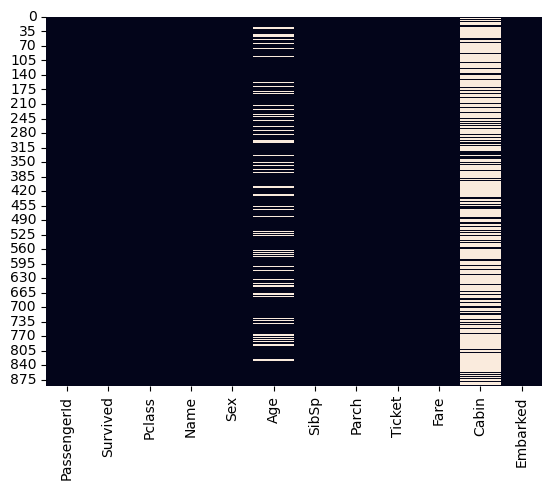

In [6]:
sns.heatmap(df_eda.isna(), cbar=False)

In [7]:
(df_eda.isna().sum()/df_eda.shape[0]).sort_values()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

### Content

First : removing useless columns

- *PassengerID* : because ID isn't relevant
- *Name* : same

For now, I don't remove other column because of a possible pattern in *Ticket* number, in *Cabin*, in *Embarked* (port), in *Fare* (price), in *SibSp* (sibling) or *Parch* (Parent/Child).

*Pclass* (passenger class), *Sex* and *Age* has to be tested.

In [8]:
df_eda = df_eda.drop(['PassengerId','Name'],axis=1)
df_eda

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.00,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.00,1,0,113803,53.1000,C123,S
4,0,3,male,35.00,0,0,373450,8.0500,NaN,S
5,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,male,54.00,0,0,17463,51.8625,E46,S
7,0,3,male,2.00,3,1,349909,21.0750,NaN,S
8,1,3,female,27.00,0,2,347742,11.1333,NaN,S
9,1,2,female,14.00,1,0,237736,30.0708,NaN,C


#### Target visualization

In [9]:
df_eda['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

#### Variables visualization

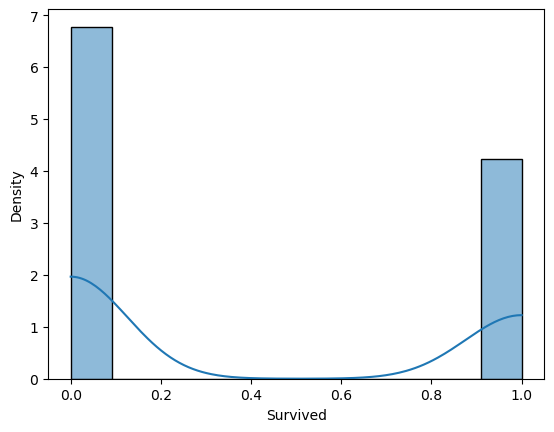

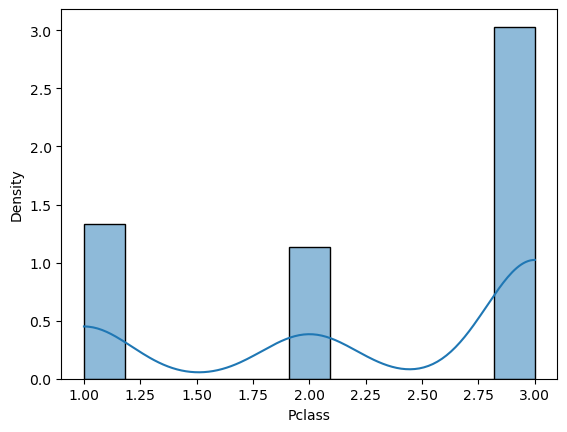

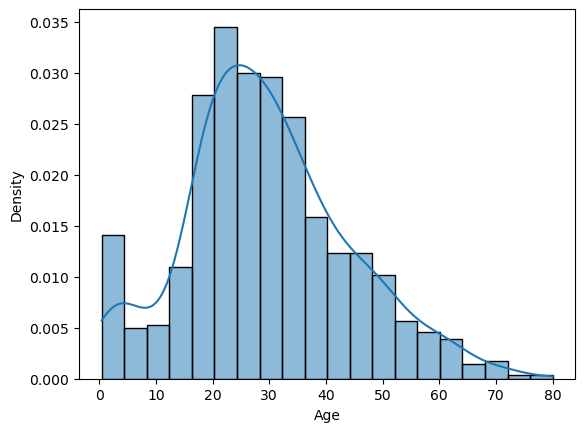

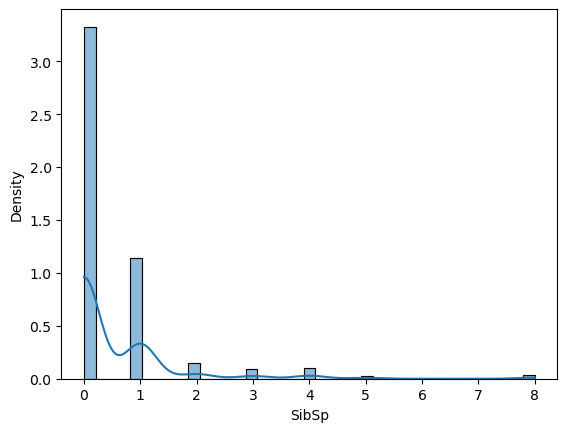

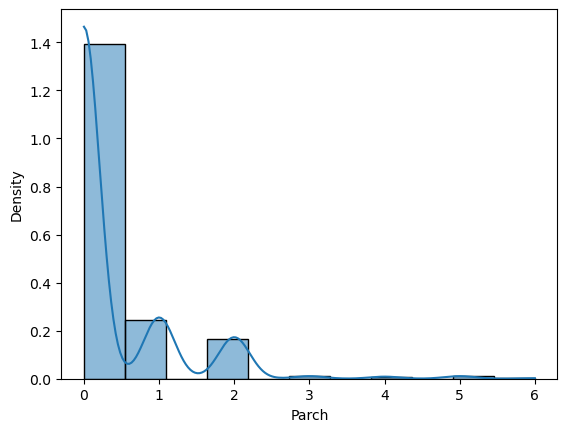

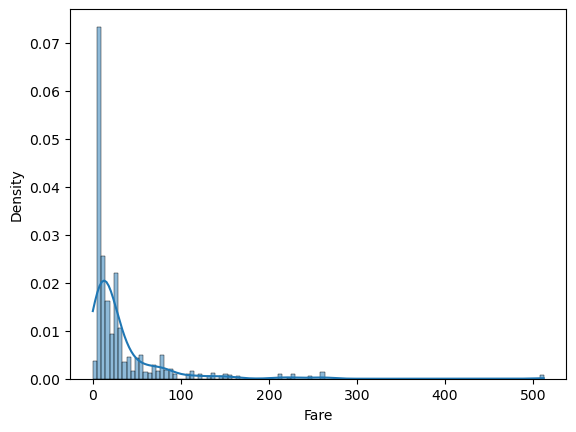

In [10]:
for col in df_eda.select_dtypes(['int64','float64']):
    plt.figure()
    sns.histplot(df_eda[col], kde=True, stat="density")

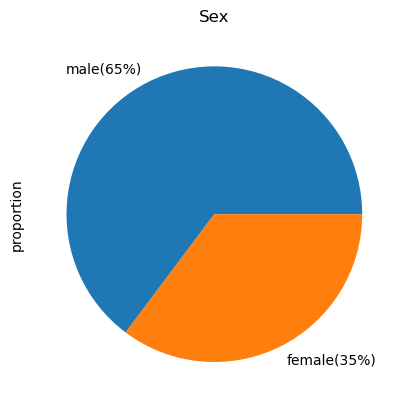

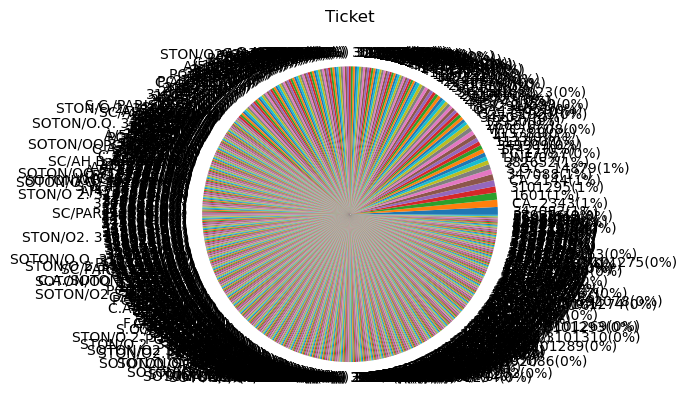

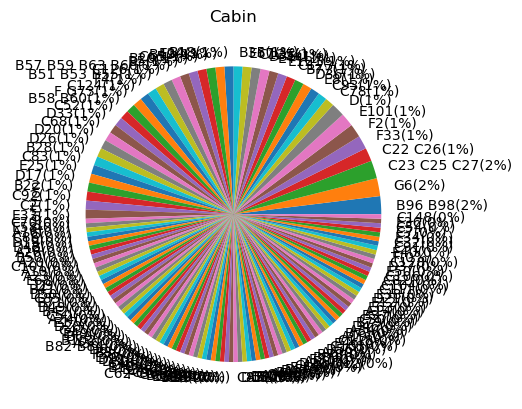

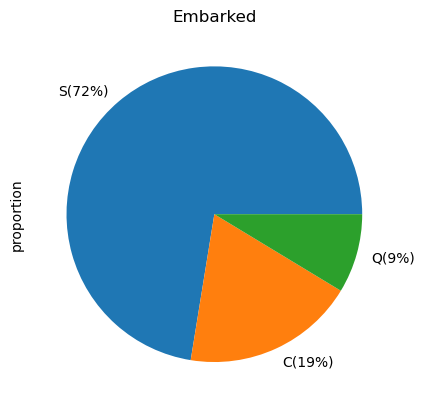

In [11]:
def get_lbl(vc):
    return [str(x) + '(' + str(int(round(y*100,0))) + '%)' for x, y in zip(vc.index, vc.values)]

for col in df_eda.select_dtypes(['object']):
    plt.figure()
    vc = df_eda[col].value_counts(normalize=True)
    vc.plot.pie(labels=get_lbl(vc), title=col)

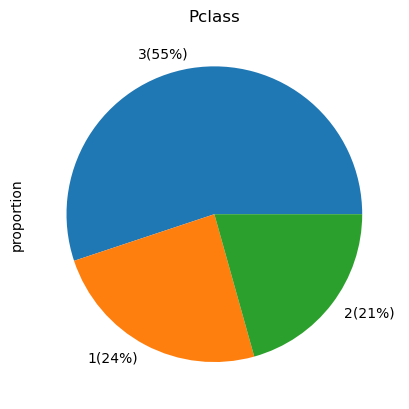

In [12]:
for col in ['Pclass']:
    plt.figure()
    vc = df_eda[col].value_counts(normalize=True)
    vc.plot.pie(labels=get_lbl(vc), title = col)

<Axes: >

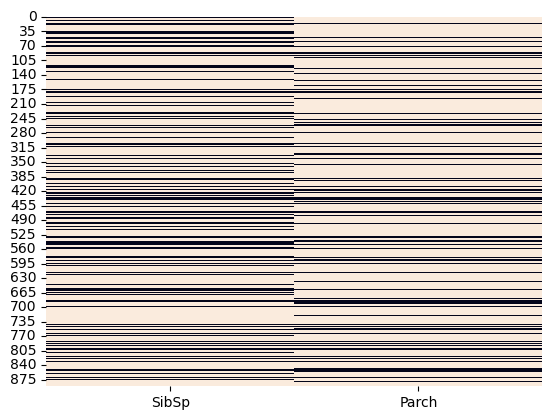

In [13]:
sns.heatmap(df_eda[['SibSp','Parch']] == 0, cbar=False)

In [14]:
# Ratio of alone passengers
tmp = df_eda[['SibSp','Parch']] == 0
tmp = tmp.SibSp & tmp.Parch
tmp.value_counts(normalize=True)

True     0.602694
False    0.397306
Name: proportion, dtype: float64

#### Sub df from target values

In [15]:
df_eda_pos = df_eda[df_eda['Survived'] == 1]
df_eda_pos.shape

(342, 10)

In [16]:
df_eda_neg = df_eda[df_eda['Survived'] == 0]
df_eda_neg.shape

(549, 10)

#### Sub group for family variables

In [17]:
family_cols = ['SibSp','Parch']

In [18]:
all_var_cols = list(df_eda.columns)
all_var_cols.remove('Survived')

#### Relation Var/Target

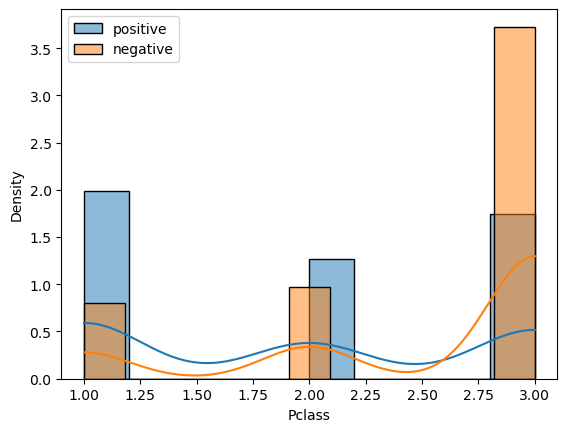

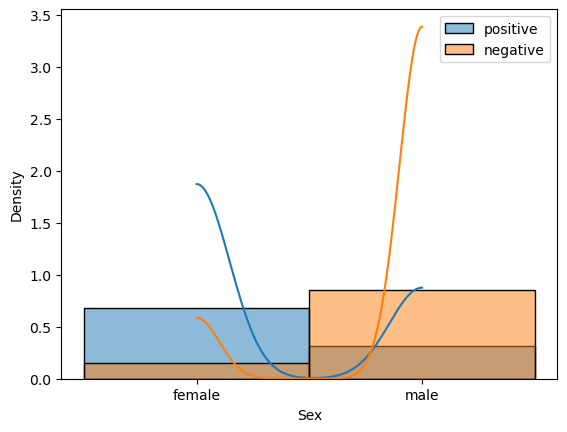

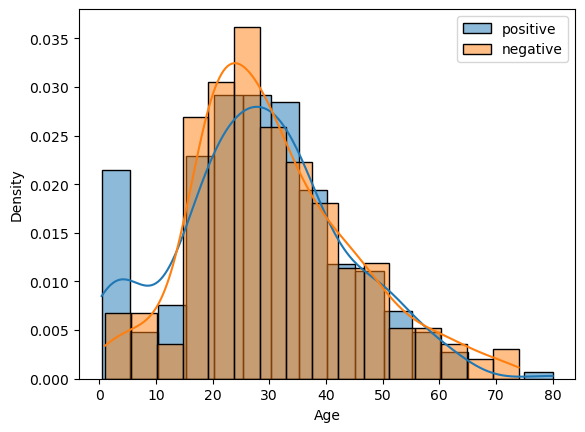

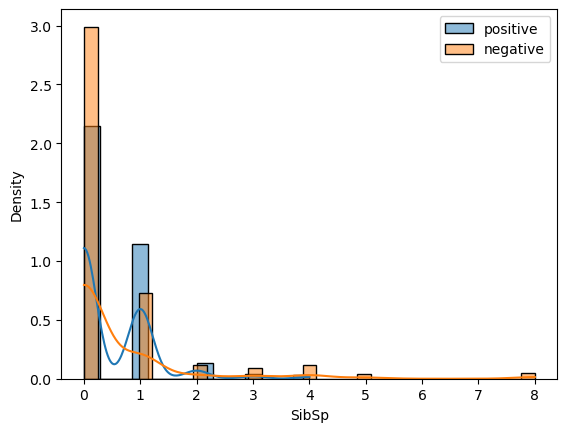

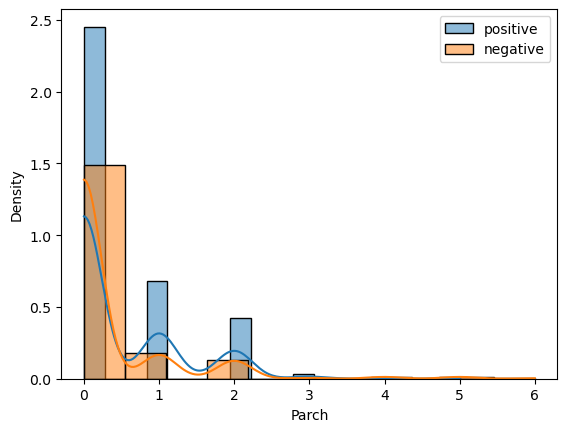

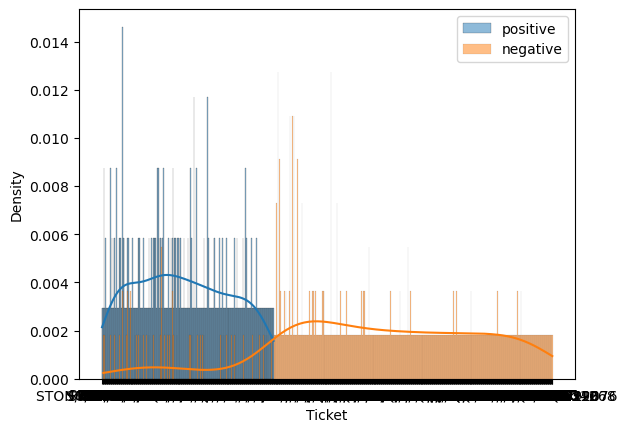

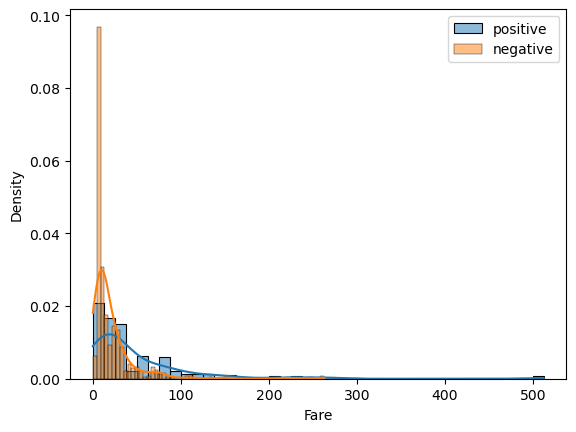

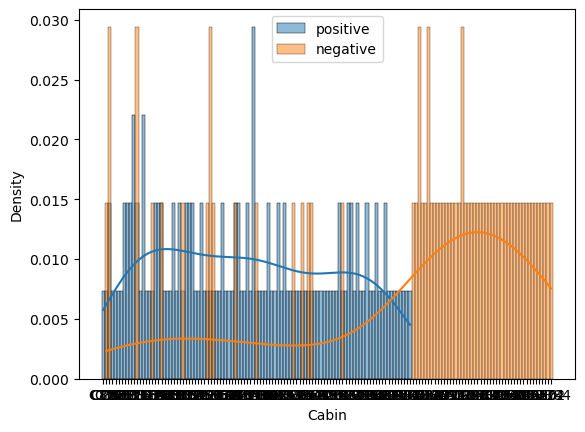

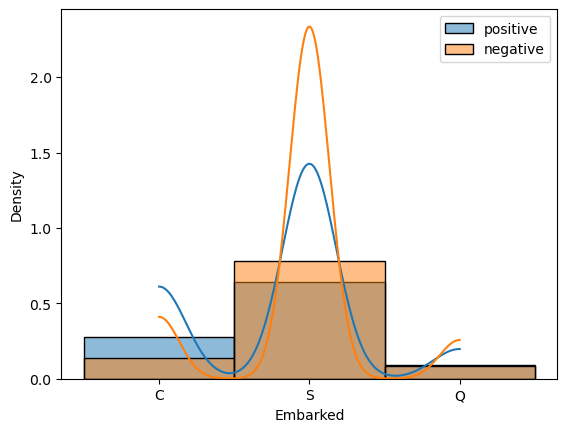

In [19]:
for col in all_var_cols:
    plt.figure()
    sns.histplot(df_eda_pos[col], kde=True, stat="density", label='positive')
    sns.histplot(df_eda_neg[col], kde=True, stat="density", label='negative')
    plt.legend()

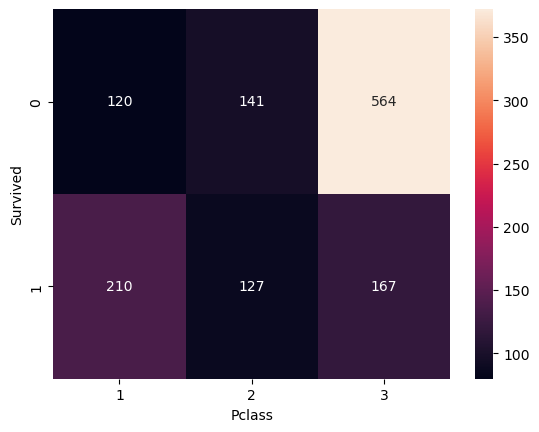

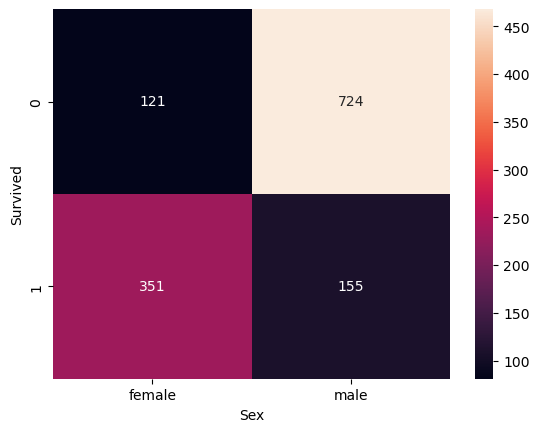

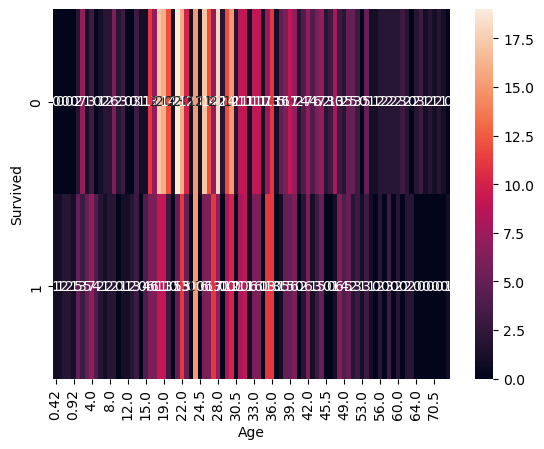

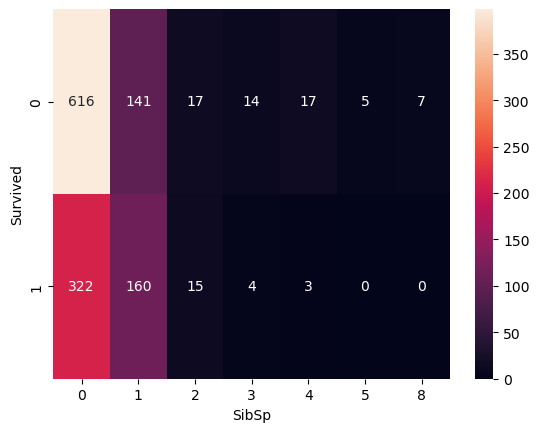

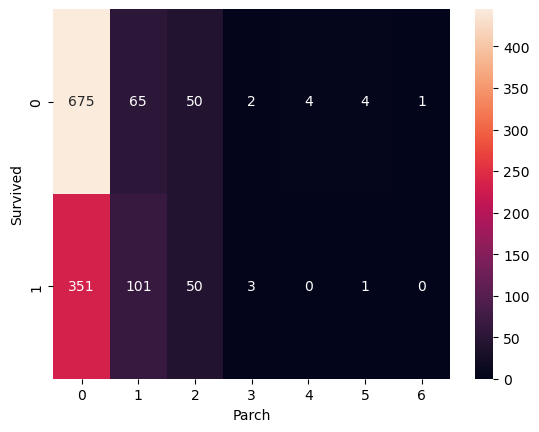

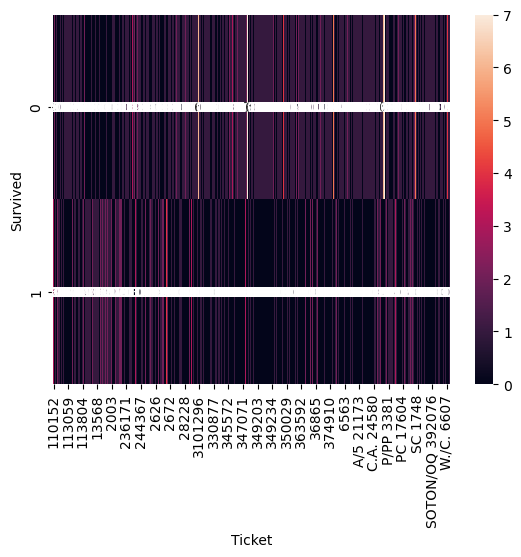

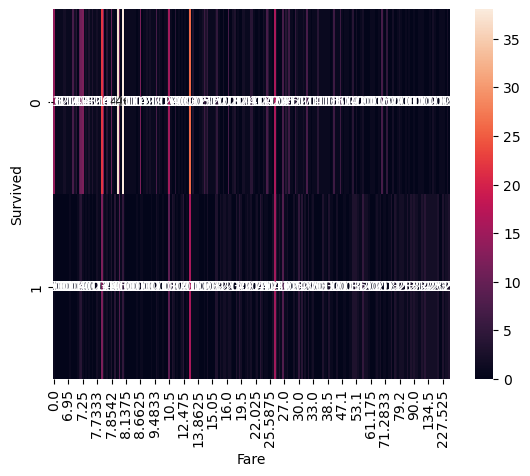

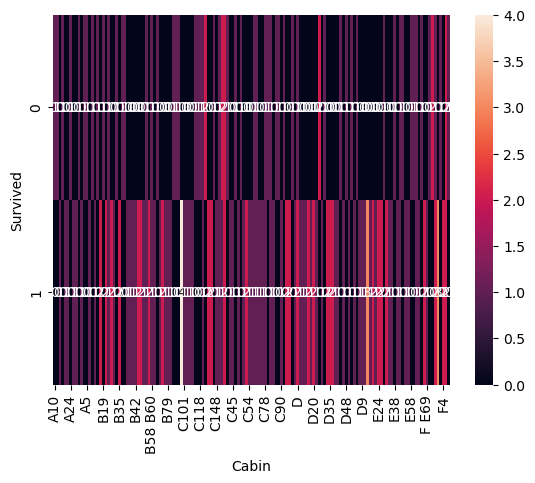

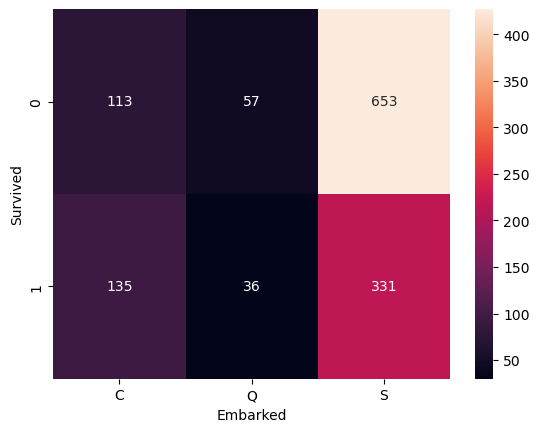

In [20]:
for col in all_var_cols:
    plt.figure()
    sns.heatmap(pd.crosstab(df_eda['Survived'], df_eda[col]), annot=True, fmt='o')

<Axes: xlabel='Embarked', ylabel='count'>

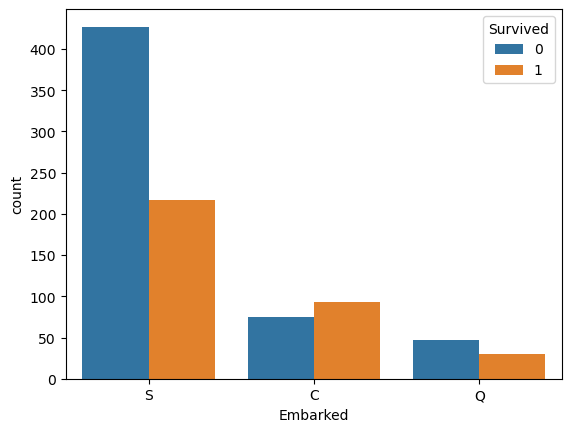

In [21]:
sns.countplot(x='Embarked', hue='Survived', data=df_eda)

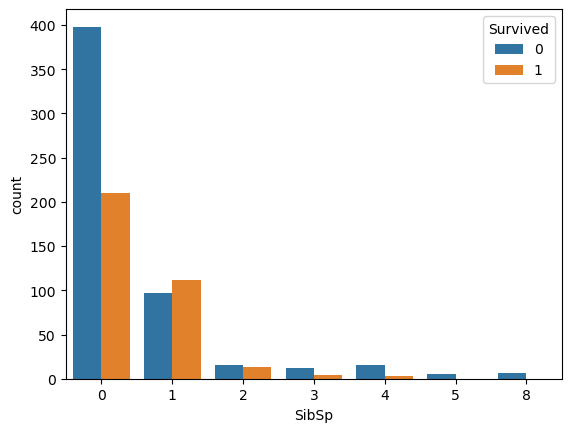

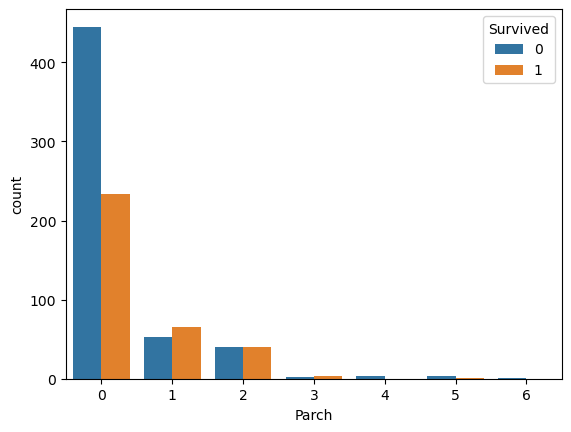

In [22]:
for col in family_cols:
    plt.figure()
    sns.countplot(x=col, hue='Survived', data=df_eda)

### Advenced EDA
#### Relation Var/Var

In [23]:
df_eda[family_cols].corr()

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


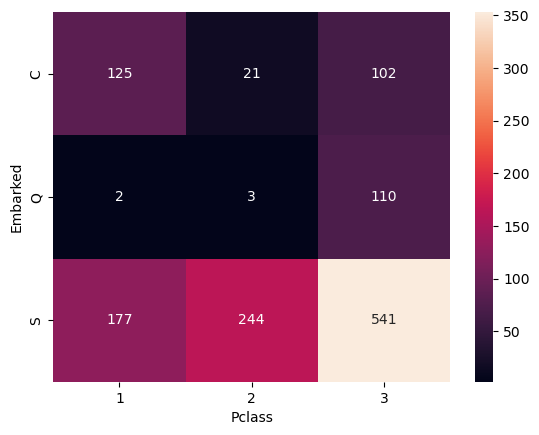

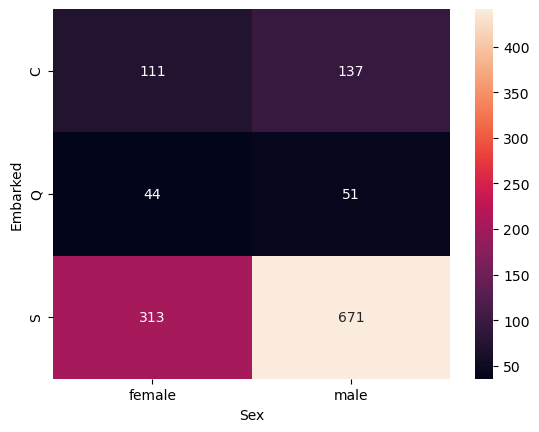

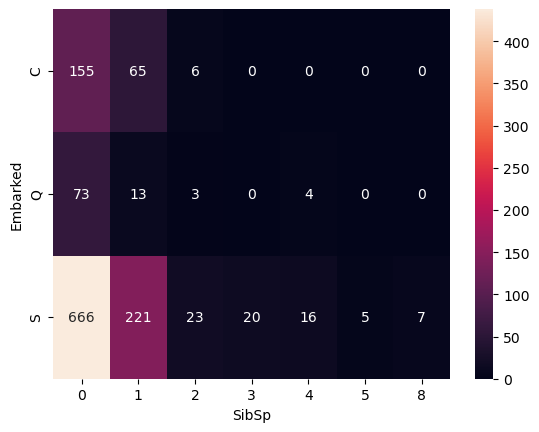

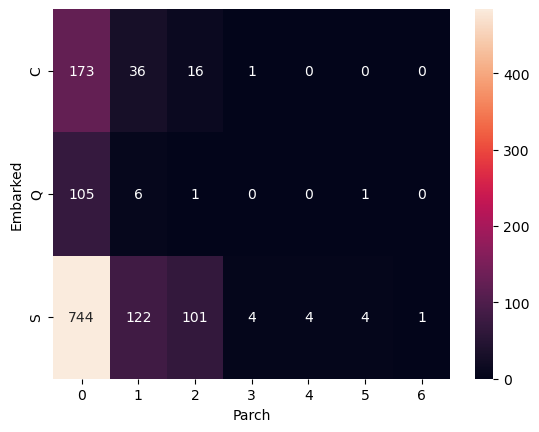

In [24]:
tmp = ['Pclass','Sex']
tmp.extend(family_cols)
for col in tmp:
    plt.figure()
    sns.heatmap(pd.crosstab(df_eda['Embarked'], df_eda[col]), annot=True, fmt='o')

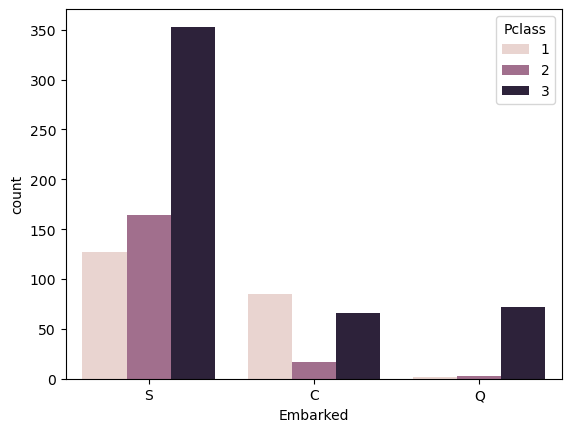

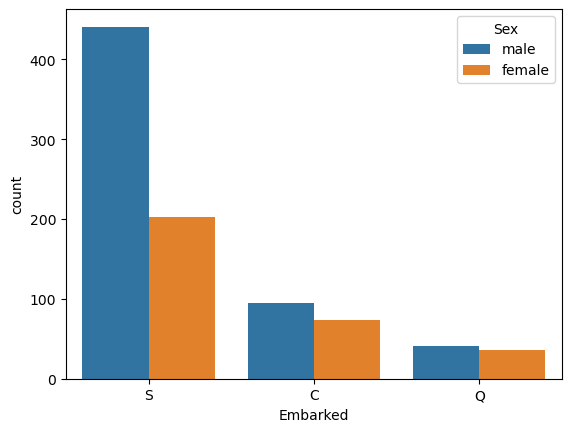

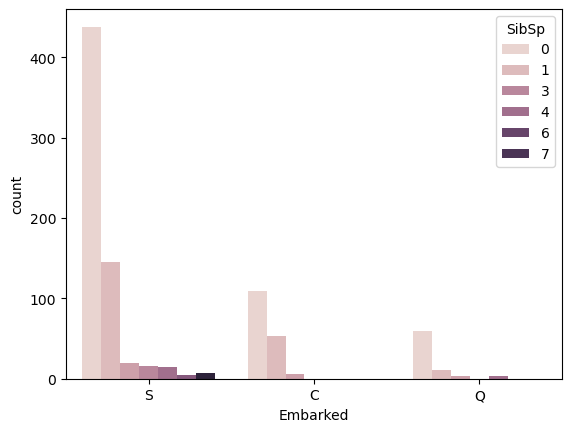

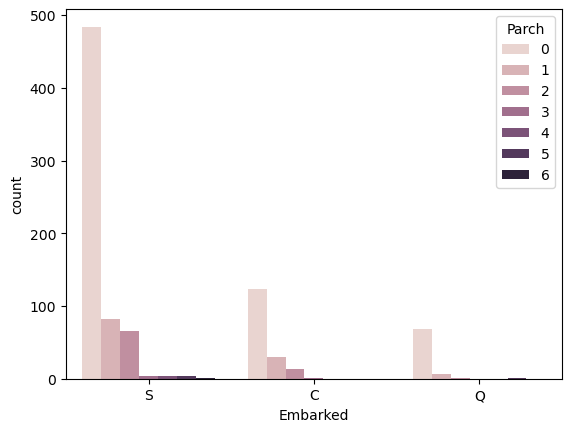

In [25]:
tmp = ['Pclass','Sex']
tmp.extend(family_cols)
for col in tmp:
    plt.figure()
    sns.countplot(x='Embarked', hue=col, data=df_eda)

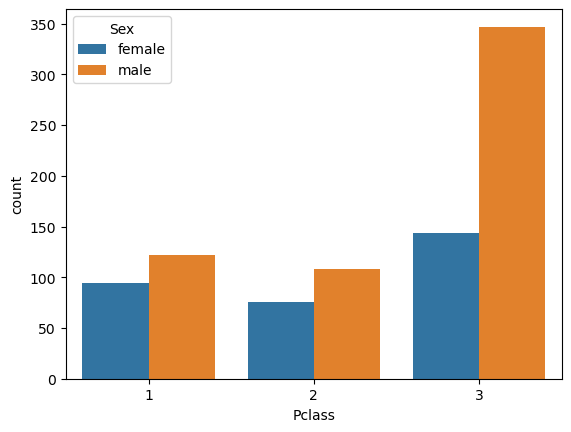

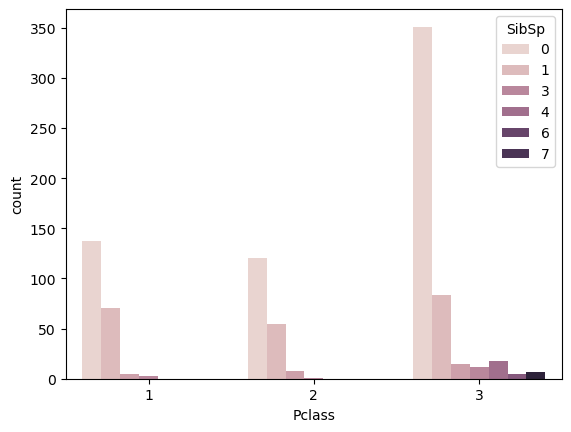

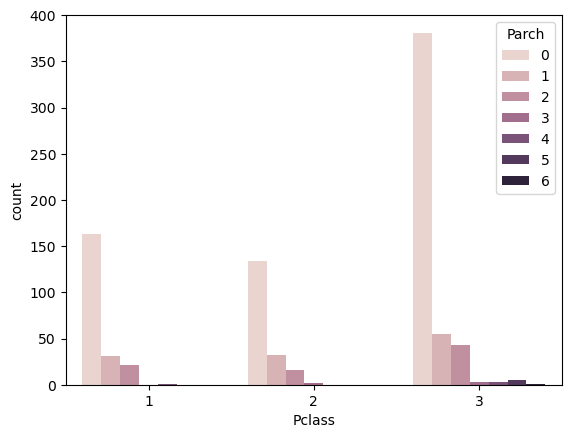

In [26]:
tmp = ['Sex']
tmp.extend(family_cols)
for col in tmp:
    plt.figure()
    sns.countplot(x='Pclass', hue=col, data=df_eda)

Test new variable : sum of sibsp and parch

In [27]:
df_eda['Family_size'] = df_eda['SibSp'] + df_eda['Parch']

<Axes: xlabel='Family_size', ylabel='count'>

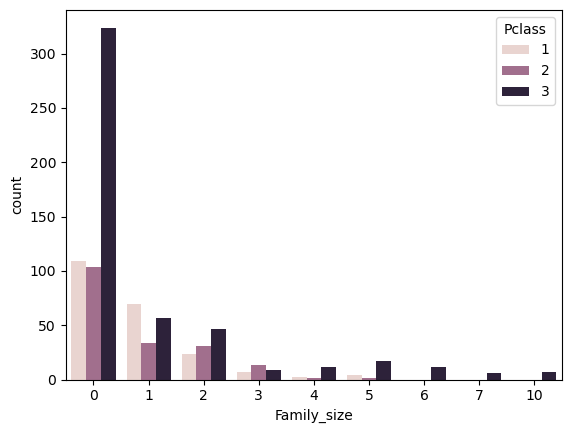

In [28]:
sns.countplot(x='Family_size', hue='Pclass', data=df_eda)

<Axes: xlabel='Embarked', ylabel='count'>

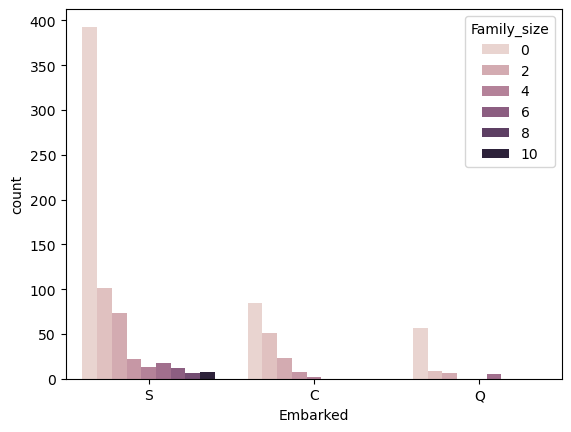

In [29]:
sns.countplot(x='Embarked', hue='Family_size', data=df_eda)

<Axes: xlabel='Family_size', ylabel='count'>

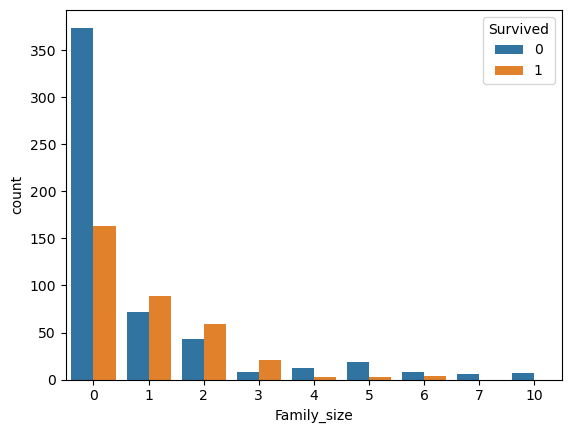

In [30]:
sns.countplot(x='Family_size', hue='Survived', data=df_eda)

#### NaN advanced

In [31]:
df_eda_age = df_eda[['Age','Survived']]
df_eda_age = df_eda_age.dropna()
df_eda_age.shape

(714, 2)

In [32]:
df_eda_age['Survived'].value_counts(normalize=True)

Survived
0    0.593838
1    0.406162
Name: proportion, dtype: float64

In [33]:
df_eda_cab = df_eda[['Cabin','Survived']]
df_eda_cab = df_eda_cab.dropna()
df_eda_cab.shape

(204, 2)

In [34]:
df_eda_cab['Survived'].value_counts(normalize=True)

Survived
1    0.666667
0    0.333333
Name: proportion, dtype: float64

In [35]:
df_eda_na = df_eda.dropna()
df_eda_na.shape

(183, 11)

In [36]:
df_eda_na['Survived'].value_counts(normalize=True)

Survived
1    0.672131
0    0.327869
Name: proportion, dtype: float64

#### Hypothesis test


In [37]:
from scipy.stats import ttest_ind, chisquare

In [38]:
df_eda['3rd_class'] = (df_eda['Pclass'] == 3)

In [39]:
df_eda['lte5yo'] = (df_eda['Age'] <= 5)
df_eda['smallFam'] = ((df_eda['Family_size'] >0) & (df_eda['Family_size'] < 4))

In [40]:
df_eda['smallFam'] = ((df_eda['Family_size'] >0) & (df_eda['Family_size'] < 4))

In [41]:
df_eda['fromS'] = (df_eda['Embarked'] == 'S')

In [42]:
#df_eda_pos = df_eda[df_eda['Survived'] == 1]

In [43]:
#df_eda_neg = df_eda[df_eda['Survived'] == 1]

In [44]:
#df_eda_pos.shape

In [45]:
#df_eda_neg.shape

In [46]:
#df_eda_neg_balenced = df_eda_neg.sample(df_eda_pos.shape[0])

In [47]:
"""
def t_test(df_pos, df_neg, col, alpha=0.05):
    stat, p = ttest_ind(df_neg[col].dropna(), df_pos[col].dropna())
    if p < alpha:
        return 'H0 rejected'
    else:
        return 'H0 not rejected (p=' + str(p) + ')'
"""

"\ndef t_test(df_pos, df_neg, col, alpha=0.05):\n    stat, p = ttest_ind(df_neg[col].dropna(), df_pos[col].dropna())\n    if p < alpha:\n        return 'H0 rejected'\n    else:\n        return 'H0 not rejected (p=' + str(p) + ')'\n"

In [48]:
def x2(df, col, target='Survived', alpha=0.05):
    cross_tab = pd.crosstab(df[col].dropna(),df[target].dropna())
    stat, p = chisquare(cross_tab)
    if p[0] < alpha:
        return 'H0 rejected'
    else:
        return 'H0 not rejected (p=' + str(p) + ')'

Passenger in 3rd class has less chance to survived

H0 : ratio of survived are the same in 3rd class than others

In [49]:
x2(df_eda,'3rd_class')

'H0 rejected'

Woomen has more chance to survived

H0 : ratio of survived is the same with men  

In [50]:
x2(df_eda, 'Sex')

'H0 rejected'

0-5 yo has more chance to survived

H0 : ratio of survived is the same with others 

In [51]:
x2(df_eda,'lte5yo')

'H0 rejected'

Passenger with [1, 3] family members has more chance to survived

H0 : ratio of survived is the same with others 

In [52]:
x2(df_eda,'smallFam')

'H0 rejected'

Passenger from S has less chance to survived

H0 : ratio of survived is the same with others 

In [53]:
x2(df_eda,'fromS')

'H0 rejected'

## Pre-processing

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import IsolationForest

### Step 1 : Formatting data to prepare model creation

- Train / test
- Encoding
- NaN cleaning

In [159]:
df = data.copy(deep=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exclude unusable columns :

In [160]:
df = df.drop(['PassengerId','Name'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0)
print(trainset.shape)
print(testset.shape)

(668, 10)
(223, 10)


In [162]:
trainset['Survived'].value_counts(normalize=True)

Survived
0    0.613772
1    0.386228
Name: proportion, dtype: float64

In [163]:
testset['Survived'].value_counts(normalize=True)

Survived
0    0.623318
1    0.376682
Name: proportion, dtype: float64

Output proportions are similar between test and train sets.

#### Encoding variables

Here we use OrdinalEncoder because we will probably use tree modeling. But for some models it is better to use OneHotEncoder.

In [164]:
def encoding(df):
    
    dct_encoder = {}
    for col in df.select_dtypes('object'):
        dct_encoder[col] = OrdinalEncoder()
        df[col] = dct_encoder[col].fit_transform(df[[col]])

    return df, dct_encoder 

In [180]:
#trainset, encoders = encoding(trainset)
#trainset.head()

In [181]:
"""
def outliers_removing(df):
    
    ndf = df
    model = IsolationForest(contamination=0.01, random_state=0)
    not_outliers = (model.fit_predict(ndf[['Fare']]) != -1)
    ndf = ndf[not_outliers]
    
    return ndf
"""

In [182]:
def feature_engineering(df):

    ndf = df
    ndf['Family_size'] = ndf['SibSp'] + ndf['Parch']
    
    ndf = ndf.drop(['Cabin','Ticket','SibSp','Parch'], axis = 1)
    
    return ndf

In [183]:
def imputation(df):
    #return df.dropna(axis=0)
    #return df.fillna(-999)
    """
    ndf['isna'] = (df['Age'].isna()) | (df['Cabin'].isna())
    ndf = ndf.fillna(-999)
    return ndf
    """
    return df.dropna(axis=0)

In [184]:
def preprocessing(df):
    ndf, encoders = encoding(df)
    ndf = feature_engineering(ndf)
    ndf = imputation(ndf)
    #ndf = outliers_removing(ndf)

    X = ndf.drop('Survived', axis = 1)
    y = ndf['Survived']

    print(y.value_counts())

    return X, y

In [185]:
X_train, y_train = preprocessing(trainset)

Survived
0    315
1    212
Name: count, dtype: int64


In [186]:
X_test, y_test = preprocessing(testset)

Survived
0    107
1     70
Name: count, dtype: int64


### Step 2 : Improve formatting to improve model

*After first models tests*
- Feature selection
- Feature engineering
- Feature scaling -> no needed because forest models aren't sensitive to normalization 
- Outliers

In [187]:
X_train.var(axis=0)

Pclass            0.693747
Sex               0.227675
Age             208.451844
Fare           1319.839703
Embarked          0.560046
Family_size       2.142221
dtype: float64

## Modelling

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif #f_classif = ANOVA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [189]:
#model = DecisionTreeClassifier(random_state=0)
#model = RandomForestClassifier(random_state=0)
model = make_pipeline(
                      #PolynomialFeatures(2),
                      SelectKBest(f_classif,k=5),
                      #PCA(n_components=4),
                      RandomForestClassifier(random_state=0)
)

### Evaluation process

In [190]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [191]:
def evaluation(model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(classification_report(y_test, y_pred))

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=5, scoring='f1',
                                               train_sizes=np.linspace(0.1,1,10)
                                              )
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[95 12]
 [20 50]]


              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.81      0.71      0.76        70

    accuracy                           0.82       177
   macro avg       0.82      0.80      0.81       177
weighted avg       0.82      0.82      0.82       177



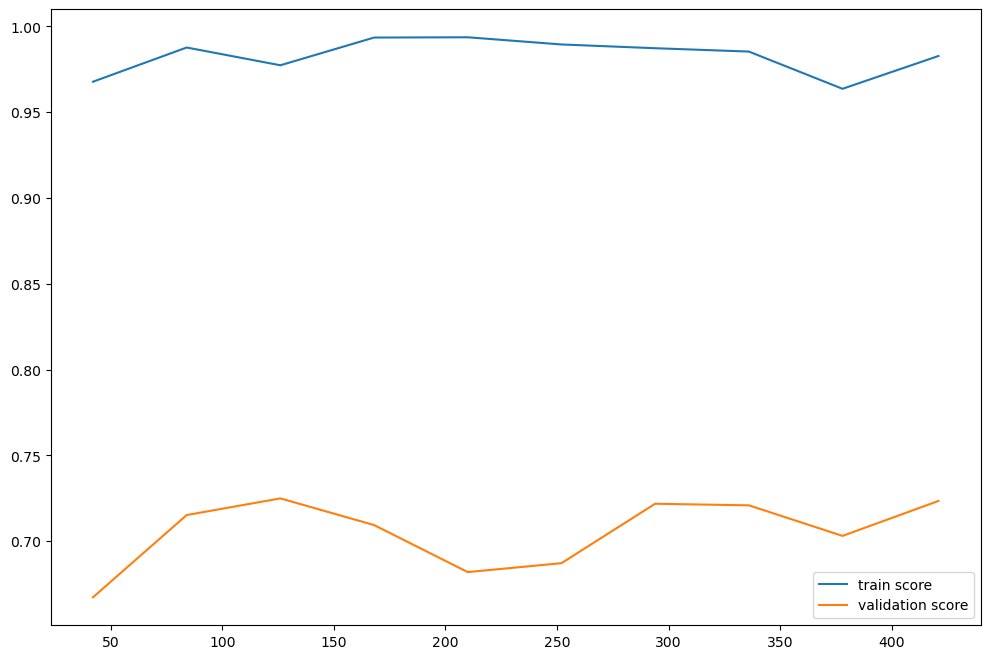

In [192]:
evaluation(model)

In [194]:
#pd.DataFrame(model.feature_importances_, index= X_train.columns).plot.bar()

- because of it's structure, *Ticket* can be a source of overfitting.
    - yes 
- maybe merge *SibSp* and *Parch* in a Family variable ?
    - slightly better
- keep *Embarked* ?
    - no negative impact
- remove fare outliers ?
    - worst   

**Pre-Modelling Try :**

142 - 41 rows
1. DecisionTree - all NaN removed - columns : ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
   - Overfitting : train score 100% + validation score ≈ 78%
   - accuracy 80%
2. Same - NaN fill with extrem value (-999) - same
   - Overfitting : train score 100% + validation score ≈ 70%
   - accuracy 67%
3. Same - Same + col *isna* - Same
    - Overfitting : train score 100% + validation score ≈ 68%
    - accuracy 70%
8. RandomForestClassifier - Same + col *isna* - Same
    - Overfitting : train score 100% + validation score ≈ 78%
    - accuracy 78%

Removing *Cabin* to have more data.

533 - 179 rows

4. DecisionTree - all NaN removed - columns : ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
   - Overfitting : train score 100% + validation score ≈ 70%
   - accuracy 71%
5. Same - NaN fill with extrem value (-999) - same
   - Overfitting : train score 100% + validation score ≈ 71%
   - accuracy 67%
6. Same - Same + col *isna* - Same
    - Overfitting : train score 100% + validation score ≈ 68%
    - accuracy 73%

NB : Same if it's median age in place of -999

7. RandomForestClassifier - all NaN removed - columns : ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
   - Overfitting : train score 100% + validation score ≈ 73%
   - accuracy 77%
9. Same - Same - columns : ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
   - Overfitting : train score 99% + validation score ≈ 73%
   - accuracy 83%

Removing *Ticket* has greatly improve accuracy.

10. Same - Same - columns : ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family_size']
   - Overfitting : train score 99% + validation score ≈ 72%
   - accuracy 84%
11. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size']
   - Overfitting : train score 99% + validation score ≈ 74%
   - accuracy 83%
   - f1 0 : 86%
   - f1 1 : 78%
12. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size','smallFam']
   - Overfitting : train score 98% + validation score ≈ 72%
   - accuracy 82%
13. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','smallFam']
   - Overfitting : train score 98% + validation score ≈ 73%
   - accuracy 82%
14. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size','lte5yo']
   - Overfitting : train score 98% + validation score ≈ 71%
   - accuracy 82%
15. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] + SelectKBest(5)
   - Overfitting : train score 99% + validation score ≈ 73%
   - accuracy 84%
   - f1 0 : 87%
   - f1 1 : 79%
16. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] + PolynomialFeature(2) + Same
   - Overfitting : train score 83% + validation score ≈ 73%
   - accuracy 77%
   - f1 0 : 79%
   - f1 1 : 74%
17. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] + PCA 2,3,4 + Same
   - all worst
17. Same - Same - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] + Remove outliers (1%) + Same
   - Overfitting : train score 96% + validation score ≈ 72%
   - accuracy 82%
   - f1 0 : 86%
   - f1 1 : 76%

**=> Best :** n°15 : 

    - RandomForestClassifier 
    - all NaN removed 
    - columns : ['Pclass','Sex','Age','Fare','Embarked','Family_size'] 
    - SelectKBest(5)

In [ ]:
X_train.columns